### Importar librerias necesarias

## EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

* Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro

Domingo 19/01 23:59 fecha entrega.

* m3_nombre_apellido.ipynb

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PARTE 1

### Carga del CSV con Pandas

In [3]:
df_diamonds = pd.read_csv('../Data/diamonds.csv')
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


#### Informacón sobre el CSV

In [4]:
df_diamonds.describe()

,carat,depth,table,y,z
count,53939.000000,53940.000000,53938.000000,53939.000000,53939.000000
mean,0.797946,61.749405,57.457145,5.734479,3.538722
std,0.474013,1.432621,2.234521,1.142092,0.705700
min,0.200000,43.000000,43.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,4.040000
max,5.010000,79.000000,95.000000,58.900000,31.800000


In [5]:
df_diamonds.isna().sum()

carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64

Limpieza de valores error: 
* hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

In [6]:
# Buscamos los valores erroneos y los pasamos a nulos para despues limpiarlos
df_diamonds[df_diamonds.isin(["?"]).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
49222,0.56,Ideal,?,VVS2,61.6,56.0,2081,?,5.29,3.27
49227,0.50,?,E,VVS2,61.7,61.0,2083,5.09,5.12,3.15
49229,0.70,Good,H,VS2,63.8,60.0,?,5.59,5.51,3.54


In [7]:
# Comprobamos que hemos eliminado los valores "?"
df_diamonds = df_diamonds.replace("?", pd.NA)
df_diamonds[df_diamonds.isin(["?"]).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


* En las columnas x, y, z si el valor es cero ponerlo a nan para luego imputarlo

In [8]:
conteo_ceros = (df_diamonds['x'] == 0).sum()
print(f"Número de ceros en la columna: {conteo_ceros}")

Número de ceros en la columna: 0


In [9]:
conteo_ceros = (df_diamonds['y'] == 0).sum()
print(f"Número de ceros en la columna: {conteo_ceros}")

Número de ceros en la columna: 7


In [10]:
import numpy as np

# Remplazamos los valores 0
df_diamonds['y'] = df_diamonds['y'].replace(0, np.nan)

# Comprobamos que ya no hay valores 0
conteo_ceros = (df_diamonds['y'] == 0).sum()
print(f"Número de ceros en la columna: {conteo_ceros}")

Número de ceros en la columna: 0


In [11]:
conteo_ceros = (df_diamonds['z'] == 0).sum()
print(f"Número de ceros en la columna: {conteo_ceros}")

Número de ceros en la columna: 20


In [12]:
# Remplazamos los valores 0
df_diamonds['z'] = df_diamonds['z'].replace(0, np.nan)

# Comprobamos que ya no hay valores 0
conteo_ceros = (df_diamonds['z'] == 0).sum()
print(f"Número de ceros en la columna: {conteo_ceros}")

Número de ceros en la columna: 0


#### Limpieza de nulos (limpiar valores NaN):
- Nulos en columnas continuas: mediana, media

In [13]:
# Comprobamos los nulos
df_diamonds.isna().sum()

carat       1
cut         4
color       3
clarity     2
depth       0
table       2
price       3
x           3
y           8
z          21
dtype: int64

In [14]:
# Columna Carat
media_carat = round(df_diamonds['carat'].mean(), 2)
print(f" La media de quilates es: {media_carat}")

 La media de quilates es: 0.8


In [15]:
df_diamonds['carat'] = df_diamonds['carat'].fillna(media_carat)
df_diamonds['carat'].isna().sum()

np.int64(0)

In [16]:
# Columna Cut
moda_cut = df_diamonds['cut'].mode()[0]
print(f" La moda de corte es: {moda_cut}")

 La moda de corte es: Ideal


In [17]:
df_diamonds['cut'] = df_diamonds['cut'].fillna(moda_cut)
df_diamonds['cut'].isna().sum()

np.int64(0)

In [18]:
# Columna Color
mediana_color = df_diamonds['color'].mode()[0]
print(f" La mediana de color es: {mediana_color}")

 La mediana de color es: G


In [19]:
df_diamonds['color'] = df_diamonds['color'].fillna(mediana_color)
df_diamonds['color'].isna().sum()

np.int64(0)

In [20]:
# Columna Clarrity
mode_clarity = df_diamonds['clarity'].mode()[0]
print(f" La mediana de claridad es: {mode_clarity}")

 La mediana de claridad es: SI1


In [21]:
# Rrelleno con un valor fijo tambien como pedia el enunciado
df_diamonds['clarity'] = df_diamonds['clarity'].fillna("Relleno")
df_diamonds['clarity'].isna().sum()

np.int64(0)

In [22]:
# Columna Table
mediana_table = round(df_diamonds['table'].mean(), 2)
print(f" La mediana del plano superior es: {mediana_table}")

 La mediana del plano superior es: 57.46


In [23]:
df_diamonds['table'] = df_diamonds['table'].fillna(mediana_table)
df_diamonds['table'].isna().sum()

np.int64(0)

In [24]:
# Columna Price
mode_price = df_diamonds['price'].mode()[0]
print(f" La moda del plano superior es: {mode_price}")

 La moda del plano superior es: 605


In [25]:
df_diamonds['price'] = df_diamonds['price'].fillna(mode_price)
df_diamonds['price'].isna().sum()

np.int64(0)

In [26]:
# Columna X
mode_x_column = df_diamonds['x'].mode()[0]
print(f" La moda de la columna X es: {mode_x_column}")

 La moda de la columna X es: 4.37


In [27]:
df_diamonds['x'] = df_diamonds['x'].fillna(mode_x_column)
df_diamonds['x'].isna().sum()

np.int64(0)

In [28]:
# Columna Y
mode_y_column = round(df_diamonds['y'].mean(), 2)
print(f" La media de la columna Y es: {mode_y_column}")

 La media de la columna Y es: 5.74


In [29]:
df_diamonds['y'] = df_diamonds['y'].fillna(mode_y_column)
df_diamonds['y'].isna().sum()

np.int64(0)

In [30]:
# Columna Z
mode_z_column = round(df_diamonds['z'].mean(), 2)
print(f" La media de la columna Y es: {mode_z_column}")

 La media de la columna Y es: 3.54


In [31]:
df_diamonds['z'] = df_diamonds['z'].fillna(mode_z_column)
df_diamonds['z'].isna().sum()

np.int64(0)

In [32]:
# Comprobamos que ya no hay nulos
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Cambio de tipo de dato: .astype()
- Columna "carat" a tipo "float16"
- Columna "cut" a tipo "categorical"


In [33]:
# Comprobamos los tipo de datos actuales
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  object 
 7   x        53940 non-null  object 
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [34]:
df_diamonds["carat"] = df_diamonds["carat"].astype("float16")
print(df_diamonds["carat"].dtypes)

float16


In [35]:
df_diamonds["cut"] = df_diamonds["cut"].astype("category")
print(df_diamonds["cut"].dtypes)

category


* Borrado de duplicados: drop_duplicates()

In [36]:
# Vemos los duplicados que hay
duplicados = df_diamonds[df_diamonds.duplicated()]
print("Duplicados encontrados:")
print(duplicados)

Duplicados encontrados:
          carat    cut color clarity  depth  table price     x     y     z
1005   0.790039  Ideal     G     SI1   62.3   57.0  2898   5.9  5.85  3.66
1006   0.790039  Ideal     G     SI1   62.3   57.0  2898   5.9  5.85  3.66
1007   0.790039  Ideal     G     SI1   62.3   57.0  2898   5.9  5.85  3.66
1008   0.790039  Ideal     G     SI1   62.3   57.0  2898   5.9  5.85  3.66
2025   1.519531   Good     E      I1   57.3   58.0  3105  7.53  7.42  4.28
...         ...    ...   ...     ...    ...    ...   ...   ...   ...   ...
47969  0.520020  Ideal     D     VS2   61.8   55.0  1919  5.19  5.16  3.20
49326  0.509766  Ideal     F    VVS2   61.2   56.0  2093  5.17  5.19  3.17
49557  0.709961   Good     F     SI2   64.1   60.0  2130     0  5.74  3.54
50079  0.509766  Ideal     F    VVS2   61.2   56.0  2203  5.19  5.17  3.17
52861  0.500000   Fair     E     VS2   79.0   73.0  2579  5.21  5.18  4.09

[146 rows x 10 columns]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [37]:
# Eliminar filas duplicados
df_diamonds = df_diamonds.drop_duplicates()

# Comprobamos que ya no hay filas con valores duplicados
duplicados = df_diamonds[df_diamonds.duplicated()]
print("Duplicados encontrados:")
print(duplicados)

Duplicados encontrados:
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


#### Encoding: texto a numérico
- Uso de la función get_dummies() para encoding one_hot

In [38]:
df_diamonds_encoding = pd.read_csv('../Data/diamonds.csv')

In [39]:
df_diamonds_encoding.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [40]:
pd.get_dummies(df_diamonds_encoding)

,carat,depth,table,y,z,cut_?,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,x_9.42,x_9.44,x_9.49,x_9.51,x_9.53,x_9.54,x_9.65,x_9.66,x_9.86,x_?
0,0.23,61.5,55.0,3.98,2.43,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.21,59.8,61.0,3.84,2.31,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.23,56.9,65.0,4.07,2.31,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.29,62.4,58.0,4.23,2.63,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.31,63.3,58.0,4.35,2.75,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.76,3.50,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
53936,0.72,63.1,55.0,5.75,3.61,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
53937,0.70,62.8,60.0,5.68,3.56,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53938,0.86,61.0,58.0,6.12,3.74,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


* Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

In [41]:
# Buscamos los tipos de corte que hay
tipos_corte =  df_diamonds['cut'].unique()
tipos_corte

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [42]:
# Creamos un diccionario con los numeros ordinales 
num_ordinal = {categoria: i + 1 for i, categoria in enumerate(tipos_corte)}
num_ordinal

{'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}

In [43]:
# Creamos la columna con los numeros ordinales
df_diamonds_encoding['cut_int'] = df_diamonds_encoding['cut'].map(num_ordinal)
print(df_diamonds_encoding)

       carat        cut color clarity  depth  table price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64   

       cut_int  
0          1.0  
1          2.0  


## PARTE 2

#### Uso de función map o apply
 * crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%)

In [44]:
# Comprobamos de que tipo es la columna "Price"
print(df_diamonds["price"].dtypes)

object


In [45]:
# Cambiamos el tipo de la columna de "Object" a "Float16"
df_diamonds["price"] = df_diamonds["price"].astype("float16")
print(df_diamonds["price"].dtypes)

float16


In [46]:
# Añadimos la columna
df_diamonds['price_iva'] = df_diamonds['price'].apply(lambda x: round(x * 1.21, 2))
df_diamonds

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva
0,0.229980,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,394.46
1,0.209961,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,394.46
2,0.229980,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,395.67
3,0.290039,Premium,I,VS2,62.4,58.0,334.0,4.2,4.23,2.63,404.14
4,0.310059,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,405.35
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.720215,Ideal,D,SI1,60.8,57.0,2756.0,5.75,5.76,3.50,3334.76
53936,0.720215,Good,D,SI1,63.1,55.0,2756.0,5.69,5.75,3.61,3334.76
53937,0.700195,Very Good,D,SI1,62.8,60.0,2756.0,5.66,5.68,3.56,3334.76
53938,0.859863,Premium,H,SI2,61.0,58.0,2756.0,6.15,6.12,3.74,3334.76


* Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):

In [47]:
# Función para calcular el descuento
def discount(des):
    if des['price'] < 1000 and des['cut'] == 'Ideal':
        return des['price'] * 0.9  # 10% de descuento
    elif 1000 <= des['price'] <= 5000 and des['cut'] == 'Premium':
        return des['price'] * 0.85  # 15% de descuento
    else:
        return des['price']  # Sin descuento

# Aplicar la función usando apply
df_diamonds['price_discount'] = df_diamonds.apply(discount, axis=1)

# Verificar las primeras filas del resultado
df_diamonds[['price', 'cut', 'price_discount']].head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,price,cut,price_discount
0,326.0,Ideal,293.4
1,326.0,Premium,326.0
2,327.0,Good,327.0
3,334.0,Premium,334.0
4,335.0,Good,335.0


* Crear una nueva columna volumen combinando: x * y * z

In [48]:
df_diamonds["x"] = df_diamonds["x"].astype("float16")
df_diamonds['volumen'] = (df_diamonds['x'] * df_diamonds['y'] * df_diamonds['z'])
df_diamonds

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,price_discount,volumen
0,0.229980,Ideal,E,SI2,61.5,55.0,326.0,3.949219,3.98,2.43,394.46,293.4,38.194474
1,0.209961,Premium,E,SI1,59.8,61.0,326.0,3.890625,3.84,2.31,394.46,326.0,34.511400
2,0.229980,Good,E,VS1,56.9,65.0,327.0,4.050781,4.07,2.31,395.67,327.0,38.084230
3,0.290039,Premium,I,VS2,62.4,58.0,334.0,4.199219,4.23,2.63,404.14,334.0,46.715889
4,0.310059,Good,J,SI2,63.3,58.0,335.0,4.339844,4.35,2.75,405.35,335.0,51.915381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.720215,Ideal,D,SI1,60.8,57.0,2756.0,5.750000,5.76,3.50,3334.76,2756.0,115.920000
53936,0.720215,Good,D,SI1,63.1,55.0,2756.0,5.691406,5.75,3.61,3334.76,2756.0,118.139365
53937,0.700195,Very Good,D,SI1,62.8,60.0,2756.0,5.660156,5.68,3.56,3334.76,2756.0,114.452888
53938,0.859863,Premium,H,SI2,61.0,58.0,2756.0,6.148438,6.12,3.74,3334.76,2342.6,140.730356


#### Ordenar por dos columnas con sort_values():
* tipo de corte (cut) y precio (price)

In [49]:
df_diamonds['price'] = df_diamonds['price'].astype('float32')
df_diamonds.sort_values(['cut', 'price'])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,price_discount,volumen
8,0.219971,Fair,E,VS2,65.1,61.0,337.0,3.869141,3.78,2.49,407.77,337.0,36.417125
28270,0.250000,Fair,E,VS1,55.2,64.0,361.0,4.210938,4.23,2.33,436.81,361.0,41.502579
31611,0.229980,Fair,G,VVS2,61.4,66.0,369.0,3.869141,3.91,2.39,446.49,369.0,36.156732
31615,0.270020,Fair,E,VS1,66.4,58.0,371.0,3.990234,4.02,2.66,448.91,371.0,42.668374
10030,0.300049,Fair,J,VS2,64.8,58.0,416.0,4.238281,4.16,2.72,503.36,416.0,47.957000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27729,2.000000,Very Good,F,SI1,57.9,60.0,18752.0,8.281250,8.34,4.81,22689.92,18752.0,332.205656
27733,1.509766,Very Good,F,VVS1,62.6,59.0,18784.0,7.328125,7.24,4.56,22728.64,18784.0,241.933650
27736,2.029297,Very Good,H,SI1,63.0,60.0,18784.0,8.000000,7.93,5.02,22728.64,18784.0,318.468800
27745,2.000000,Very Good,H,SI1,62.8,57.0,18800.0,7.949219,8.00,5.01,22748.00,18800.0,318.604688


* Agrupaciones con groupby y visualizarla
    * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

In [50]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   carat           53794 non-null  float16 
 1   cut             53794 non-null  category
 2   color           53794 non-null  object  
 3   clarity         53794 non-null  object  
 4   depth           53794 non-null  float64 
 5   table           53794 non-null  float64 
 6   price           53794 non-null  float32 
 7   x               53794 non-null  float16 
 8   y               53794 non-null  float64 
 9   z               53794 non-null  float64 
 10  price_iva       53794 non-null  float64 
 11  price_discount  53794 non-null  float64 
 12  volumen         53794 non-null  float64 
dtypes: category(1), float16(2), float32(1), float64(7), object(2)
memory usage: 4.6+ MB


In [51]:
df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]})

/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_1682/19955734.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]})


price                      
                            min      max         mean
cut       color clarity                              
Fair      D     I1       2492.0  15968.0  7384.000000
                IF       1208.0   2212.0  1620.000000
                Relleno     NaN      NaN          NaN
                SI1       644.0  16384.0  4273.482910
                SI2       536.0  16088.0  4354.928711
...                         ...      ...          ...
Very Good J     SI2       430.0  17168.0  5993.179688
                VS1       394.0  17920.0  4371.772949
                VS2       357.0  18432.0  5325.592285
                VVS1      544.0  10808.0  3175.421143
                VVS2      336.0  16040.0  5960.034668

[315 rows x 3 columns]

In [52]:
df_diamonds_table = df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]}).reset_index()

/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_1682/798875415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds_table = df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]}).reset_index()


In [53]:
# Ajustar nombres de columnas
df_diamonds_table.columns = ['cut', 'color', 'clarity', 'price_min', 'price_max', 'price_mean']

In [54]:
# Agrupar por las columnas categóricas y calcular estadísticas sobre las columnas numéricas
grouped_data = df_diamonds.groupby(['cut', 'color', 'clarity']).agg({
    'price': ['mean', 'max', 'min'],
    'carat': ['mean', 'max', 'min'],
    'depth': ['mean', 'max', 'min']
}).reset_index()

# Ajustar nombres de columnas para mayor claridad
grouped_data.columns = [
    'cut', 'color', 'clarity',
    'price_mean', 'price_max', 'price_min',
    'carat_mean', 'carat_max', 'carat_min',
    'depth_mean', 'depth_max', 'depth_min'
]

/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_1682/3146803045.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_diamonds.groupby(['cut', 'color', 'clarity']).agg({


/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_1682/3736336053.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = grouped_data.pivot_table(


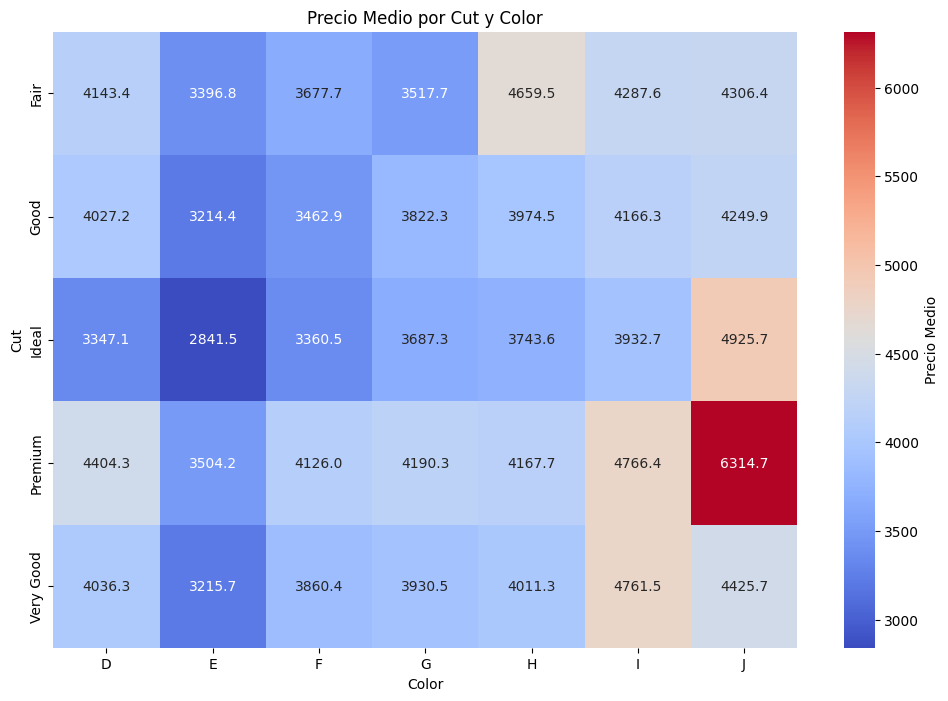

In [55]:
# Datos para el heatmap
heatmap_data = grouped_data.pivot_table(
    index='cut',
    columns='color',
    values='price_mean',
    aggfunc='mean'
)

# Visualización del heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Precio Medio'})
plt.title("Precio Medio por Cut y Color")
plt.xlabel("Color")
plt.ylabel("Cut")
plt.show()

## PARTE 3

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar sobre la columna precio.

In [56]:
# Q1
q1_price = df_diamonds["price"].quantile(0.25)
print(f"El Q1 de la columna precio es: {q1_price}")

El Q1 de la columna precio es: 951.0


In [57]:
# Q3
q3_price = df_diamonds["price"].quantile(0.75)
print(f"El Q1 de la columna precio es: {q3_price}")

El Q1 de la columna precio es: 5324.0


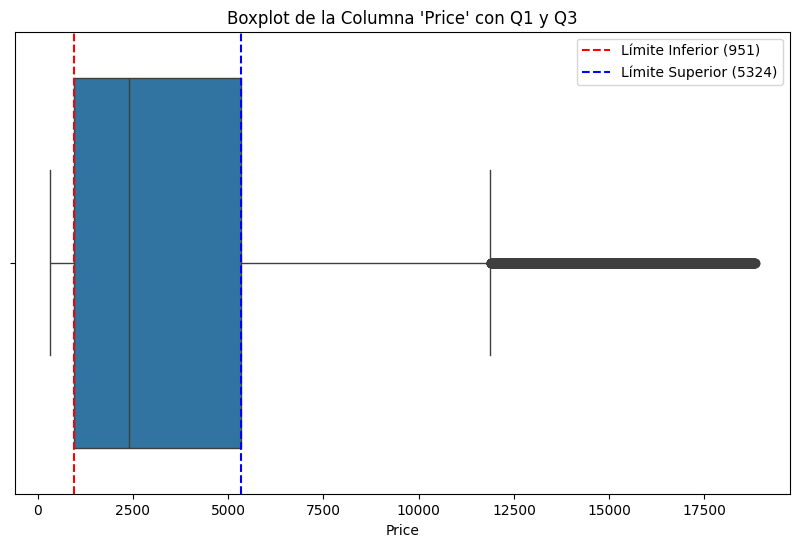

In [58]:
# Visualización con un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_diamonds['price'])
plt.axvline(q1_price, color='red', linestyle='--', label=f"Límite Inferior ({q1_price:.0f})")
plt.axvline(q3_price, color='blue', linestyle='--', label=f"Límite Superior ({q3_price:.0f})")
plt.title("Boxplot de la Columna 'Price' con Q1 y Q3")
plt.xlabel("Price")
plt.legend()
plt.show()

In [59]:
# Tukey
# Rango intercuartil (IQR)
iqr_range = q3_price - q1_price

# Límites inferior y superior
low_limit = q1_price - 1.5 * iqr_range
up_limit = q3_price + 1.5 * iqr_range

# Identificar outliers
outliers = df_diamonds[(df_diamonds['price'] < low_limit) | (df_diamonds['price'] > up_limit)]

# Identificar valores no outliers
non_outliers = df_diamonds[(df_diamonds['price'] >= low_limit) & (df_diamonds['price'] <= up_limit)]

# Mostrar resultados
print(f"EL IQR de la columna precio es: {iqr_range}")
print(f"El límite inferior: {low_limit}")
print(f"El límite superior: {up_limit}")
print(f"Los Outliers son: {outliers}")

EL IQR de la columna precio es: 4373.0
El límite inferior: -5608.5
El límite superior: 11883.5
Los Outliers son:           carat        cut color clarity  depth  table    price         x  \
23820  1.169922      Ideal     F    VVS1   62.1   57.0  11888.0  6.820312   
23821  2.080078      Ideal     I     SI2   62.0   56.0  11888.0  8.210938   
23822  1.700195    Premium     I     VS2   62.2   58.0  11888.0  7.648438   
23823  1.089844      Ideal     F      IF   61.6   55.0  11888.0  6.589844   
23824  1.679688      Ideal     E     SI2   60.4   55.0  11888.0  7.789062   
...         ...        ...   ...     ...    ...    ...      ...       ...   
27745  2.000000  Very Good     H     SI1   62.8   57.0  18800.0  7.949219   
27746  2.070312      Ideal     G     SI2   62.5   55.0  18800.0  8.203125   
27747  1.509766      Ideal     G      IF   61.7   55.0  18800.0  7.371094   
27748  2.000000  Very Good     G     SI1   63.5   56.0  18816.0  7.898438   
27749  2.289062    Premium     I     VS2

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


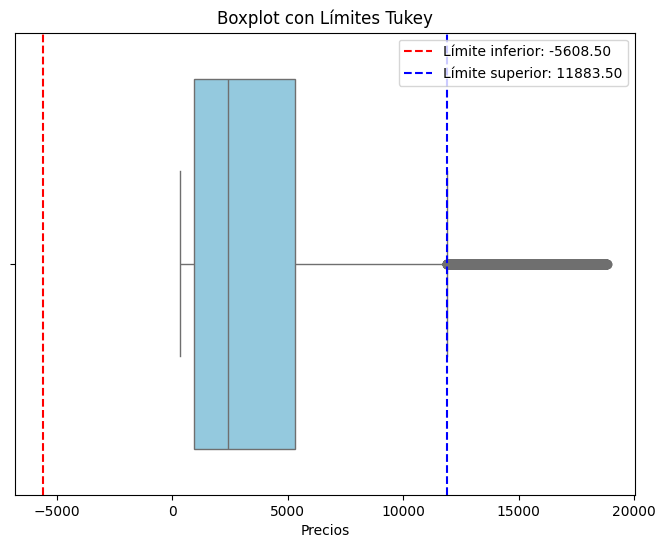

In [60]:
# Boxplot con Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diamonds['price'], color='skyblue')

# Líneas para los límites Tukey
plt.axvline(x=low_limit, color='red', linestyle='--', label=f'Límite inferior: {low_limit:.2f}')
plt.axvline(x=up_limit, color='blue', linestyle='--', label=f'Límite superior: {up_limit:.2f}')

plt.title('Boxplot con Límites Tukey')
plt.xlabel('Precios')
plt.legend()
plt.show()

* Asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada. 
    - aplicar sobre precio. 
    - visualizar el histograma y/o boxplot por tipo de corte. 
    - Opcional ajustar la escala.

In [61]:
asimetria_precio = df_diamonds['price'].skew()
print(f" La asimetria de de la columna precio es: {asimetria_precio}")

 La asimetria de de la columna precio es: 1.618237018585205


In [62]:
kurtosis_precio = df_diamonds['price'].kurt()

if kurtosis_precio >0:
    print(f"La curtosis de de la columna precio es: {kurtosis_precio}")
    print("La curtosis es Leptocúrtica")
elif kurtosis_precio <0:
    print(f"La curtosis de de la columna precio es: {kurtosis_precio}")
    print("La curtosis es Platicútica")
else:
    print(f"La curtosis de de la columna precio es: {kurtosis_precio}")
    print("La curtosis es Mesocúrtica")
    
   


La curtosis de de la columna precio es: 2.1785151958465576
La curtosis es Leptocúrtica


/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_1682/2729255034.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds.hist(column='price', by='cut', bins=30, figsize=(12, 10), sharex=False)


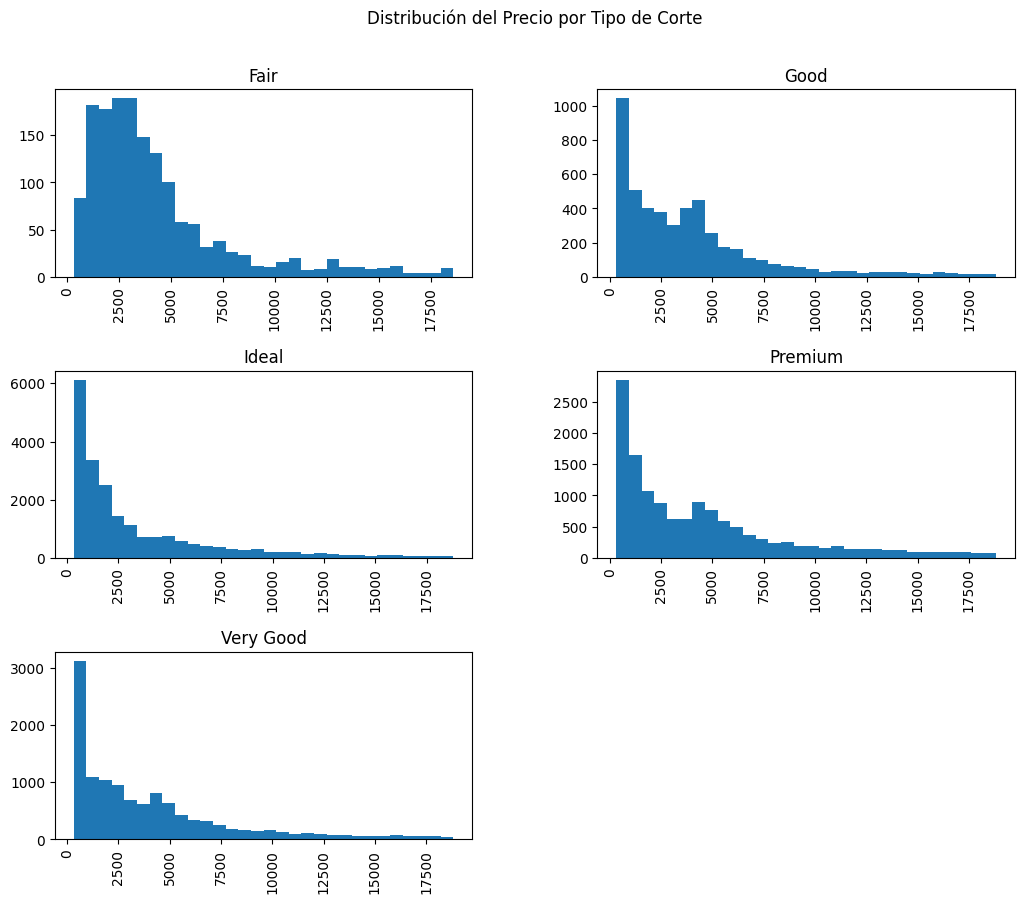

In [63]:
# Histograma de precios por tipo de corte
df_diamonds.hist(column='price', by='cut', bins=30, figsize=(12, 10), sharex=False)
plt.suptitle("Distribución del Precio por Tipo de Corte")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")  
plt.show()

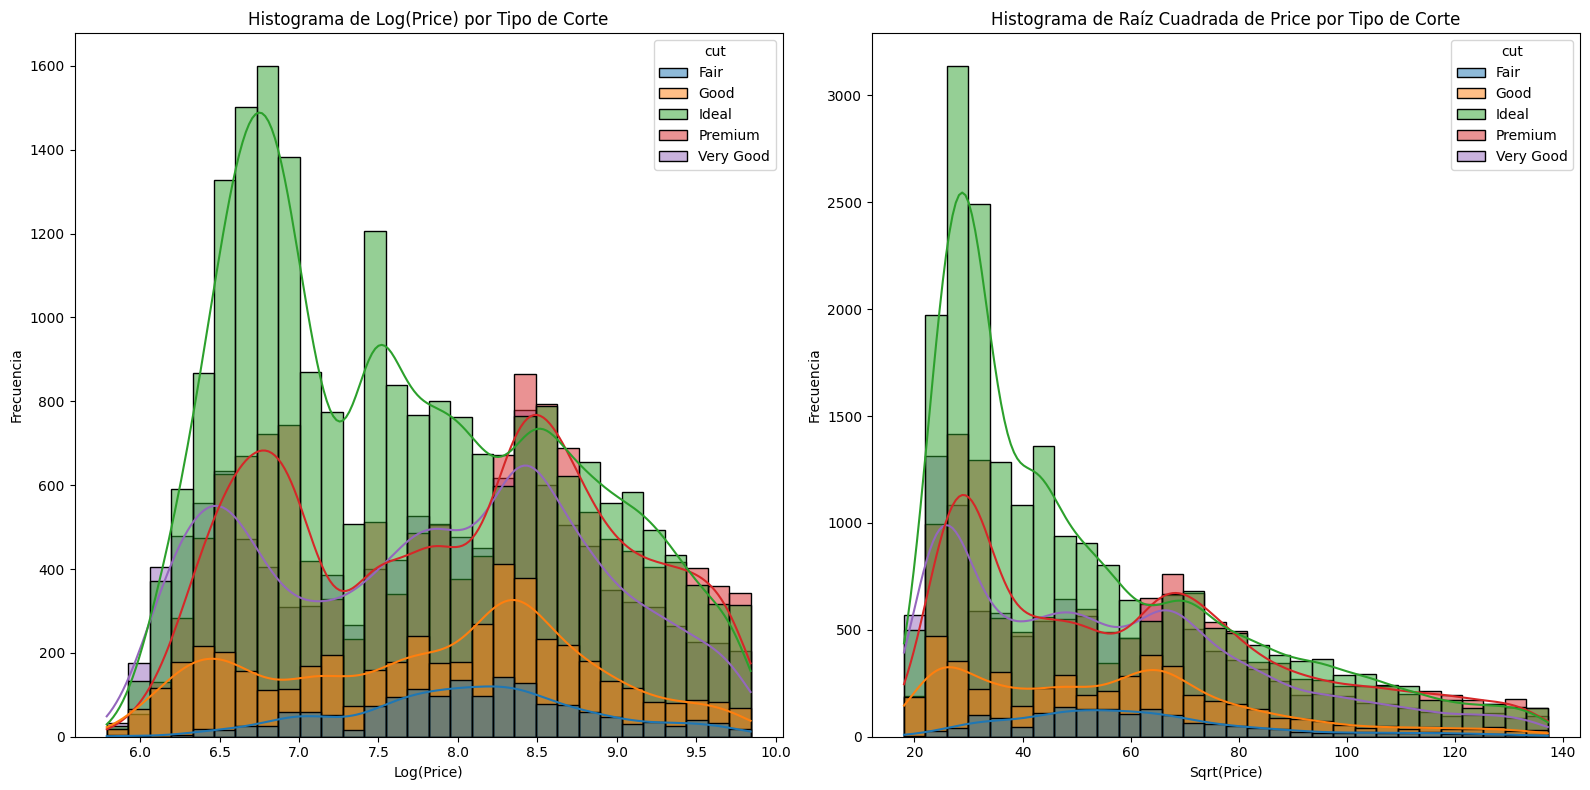

(np.float32(1.618237), np.float32(2.1785152))

In [64]:
# Crear columnas con las transformaciones logarítmica y raíz cuadrada
df_diamonds['log_price'] = np.log(df_diamonds['price'] + 1)  # Evitar log(0)
df_diamonds['sqrt_price'] = np.sqrt(df_diamonds['price'])

# Visualizar histogramas para las transformaciones
plt.figure(figsize=(16, 8))

# Histograma para log(price)
plt.subplot(1, 2, 1)
sns.histplot(data=df_diamonds, x='log_price', hue='cut', kde=True, bins=30)
plt.title("Histograma de Log(Price) por Tipo de Corte")
plt.xlabel("Log(Price)")
plt.ylabel("Frecuencia")

# Histograma para sqrt(price)
plt.subplot(1, 2, 2)
sns.histplot(data=df_diamonds, x='sqrt_price', hue='cut', kde=True, bins=30)
plt.title("Histograma de Raíz Cuadrada de Price por Tipo de Corte")
plt.xlabel("Sqrt(Price)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Mostrar valores de simetría y curtosis
asimetria_precio, kurtosis_precio 

* Discretizar la columna precio en 3-4 opciones por barato, medio, caro usando la función pd.cut

In [92]:
# Valores mínimo y máximo para definir correctamente los rangos
price_min = df_diamonds['price'].min()
price_max = df_diamonds['price'].max()

# Rangos de precios asegurando la correcta separación
bins = [price_min, 3000, 8000, price_max]  # Ajustado para una mejor distribución

# Etiquetas para cada grupo
labels = ['Barato', 'Medio', 'Caro']

# Aplicar pd.cut para categorizar precios
df_diamonds['price_category'] = pd.cut(df_diamonds['price'], bins=bins, labels=labels, include_lowest=True)

# Mostrar conteo de cada categoría
print(df_diamonds['price_category'].value_counts())

# Crear un diccionario con los precios exactos en cada categoría
price_groups = {
    "Barato": df_diamonds[df_diamonds['price_category'] == "Barato"]['price'].tolist(),
    "Medio": df_diamonds[df_diamonds['price_category'] == "Medio"]['price'].tolist(),
    "Caro": df_diamonds[df_diamonds['price_category'] == "Caro"]['price'].tolist(),
}

# Convertirlo en un DataFrame para mostrarlo mejor
df_price_groups = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in price_groups.items()]))

price_category
Barato    30258
Medio     15960
Caro       7576
Name: count, dtype: int64


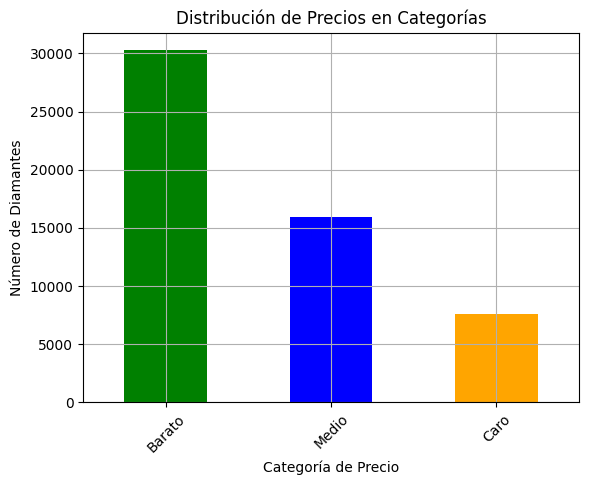

In [87]:
import matplotlib.pyplot as plt

df_diamonds['price_category'].value_counts().plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title("Distribución de Precios en Categorías")
plt.xlabel("Categoría de Precio")
plt.ylabel("Número de Diamantes")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## PARTE 4

#### Seaborn EDAS

##### Univariantes:
- histogramas y curvas de densidad
- boxplot
- countplot

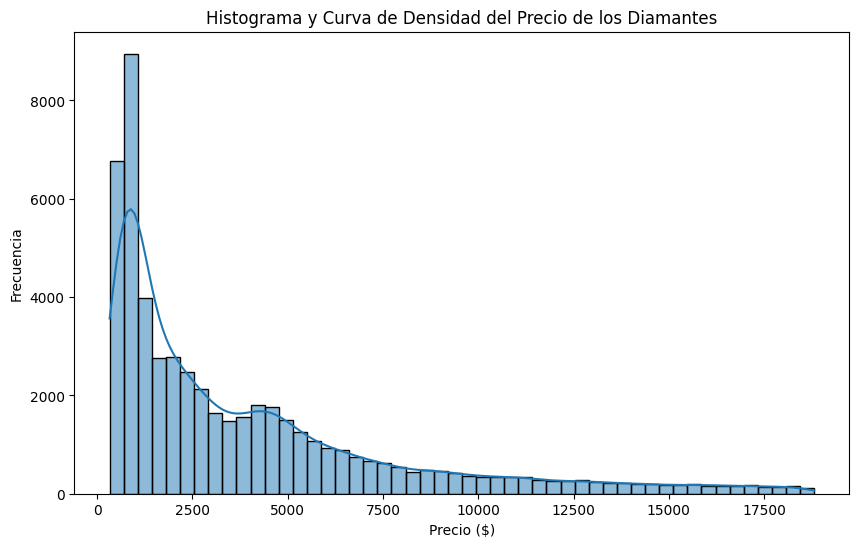

In [100]:
# Histograma y curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df_diamonds['price'],bins=50, kde=True)
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.title('Histograma y Curva de Densidad del Precio de los Diamantes')
plt.show()


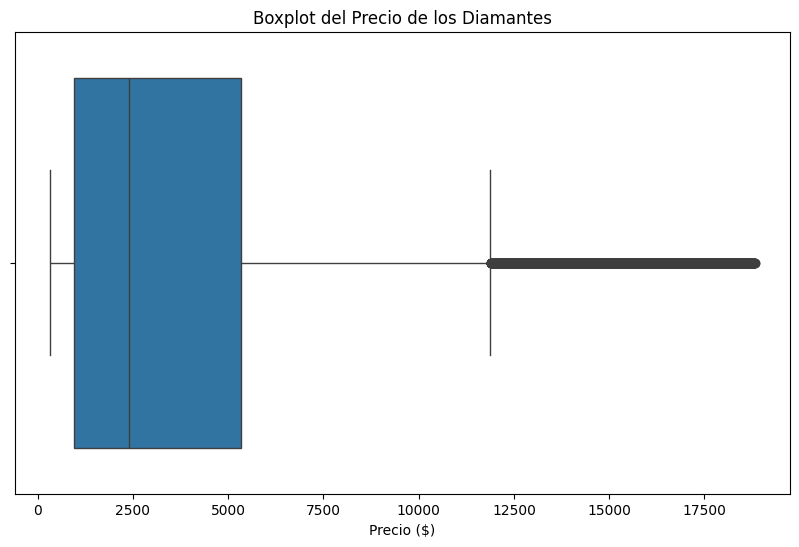

In [102]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_diamonds['price'])
plt.xlabel('Precio ($)')
plt.title('Boxplot del Precio de los Diamantes')
plt.show()

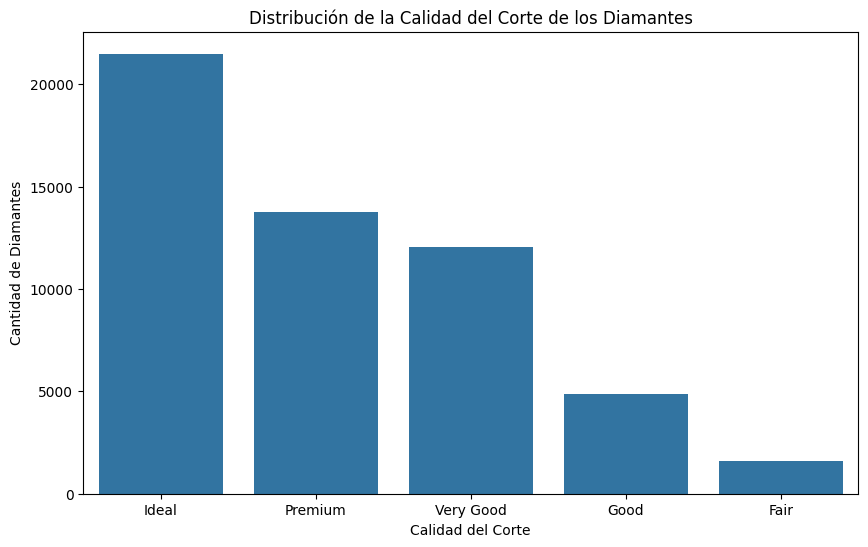

In [105]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=df_diamonds['cut'], order=df_diamonds['cut'].value_counts().index)
plt.xlabel('Calidad del Corte')
plt.ylabel('Cantidad de Diamantes')
plt.title('Distribución de la Calidad del Corte de los Diamantes')
# plt.xticks(rotation=45)
plt.show()


 #### Bivariantes y Multivariantes
* scatterplot con hue, con size, con style

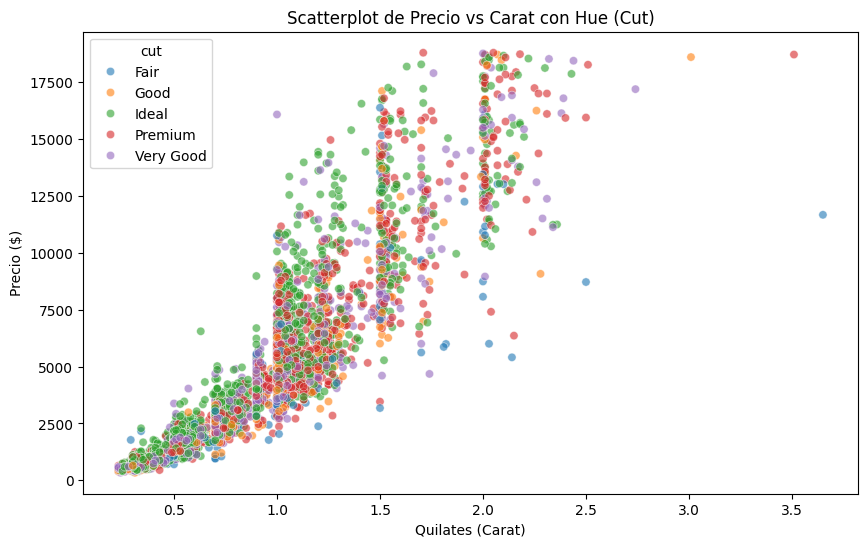

In [107]:
# Scatterplot con hue (color basado en la variable "cut")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diamonds.sample(5000, random_state=42), x='carat', y='price', hue='cut', alpha=0.6)
plt.xlabel('Quilates (Carat)')
plt.ylabel('Precio ($)')
plt.title('Scatterplot de Precio vs Carat con Hue (Cut)')
plt.show()

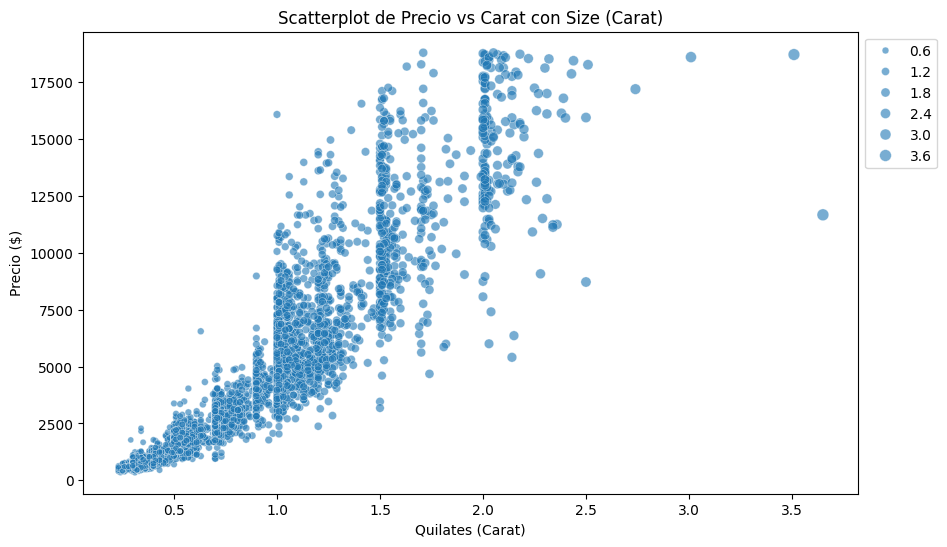

In [108]:
# Scatterplot con size (tamaño de puntos basado en "carat")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diamonds.sample(5000, random_state=42), x='carat', y='price', size='carat', alpha=0.6)
plt.xlabel('Quilates (Carat)')
plt.ylabel('Precio ($)')
plt.title('Scatterplot de Precio vs Carat con Size (Carat)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

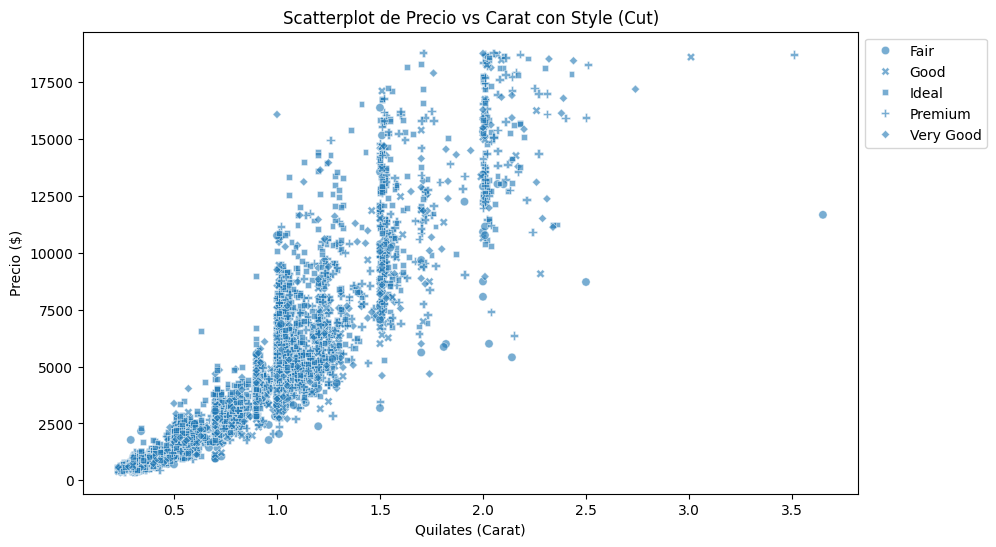

In [109]:
# Scatterplot con style (diferentes estilos de puntos por "cut")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diamonds.sample(5000, random_state=42), x='carat', y='price', style='cut', alpha=0.6)
plt.xlabel('Quilates (Carat)')
plt.ylabel('Precio ($)')
plt.title('Scatterplot de Precio vs Carat con Style (Cut)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

* Calcular correlación con Pandas y mostrarla con seaborn

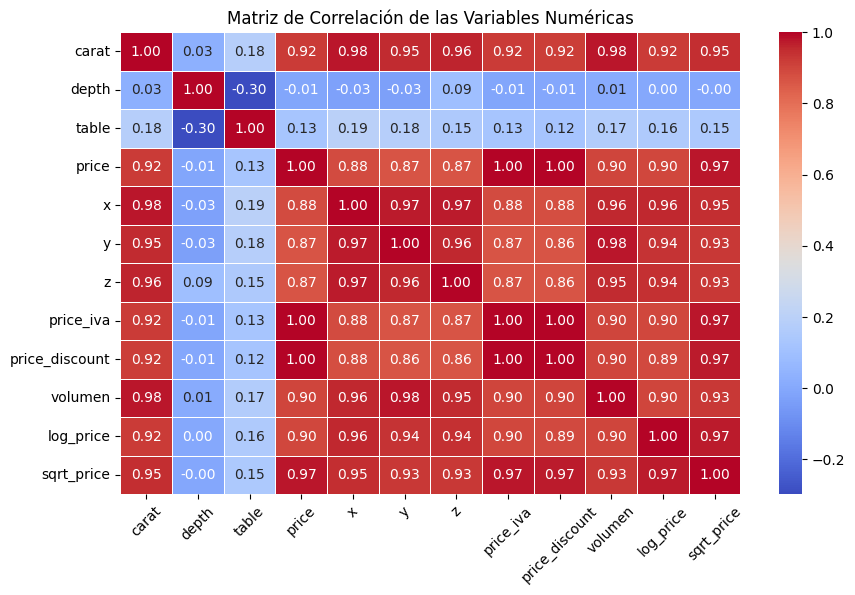

In [ ]:
# Matriz de correlación
correlation_matrix = df_diamonds.corr(numeric_only=True)

# Heatmap para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables Numéricas")
plt.xticks(rotation=45)
plt.show()

* Hacer la correlación en un gráfico de barras para la columna 'price'

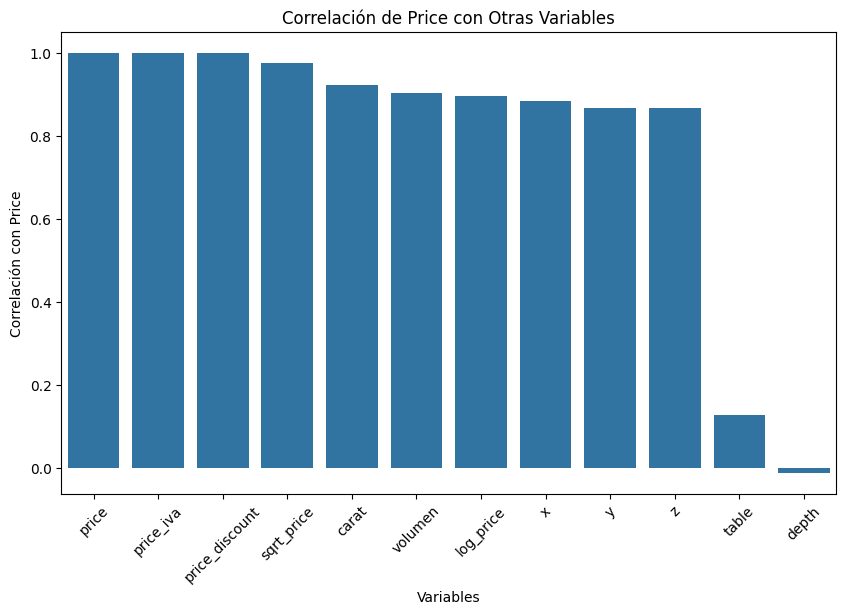

In [116]:
# Correlación de "price" con las demás variables
price_correlation = correlation_matrix["price"].sort_values(ascending=False)

# Gráfico de barras con la correlación de "price"
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index, y=price_correlation.values)
plt.xlabel("Variables")
plt.ylabel("Correlación con Price")
plt.title("Correlación de Price con Otras Variables")
plt.xticks(rotation=45)
plt.show()


* Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn

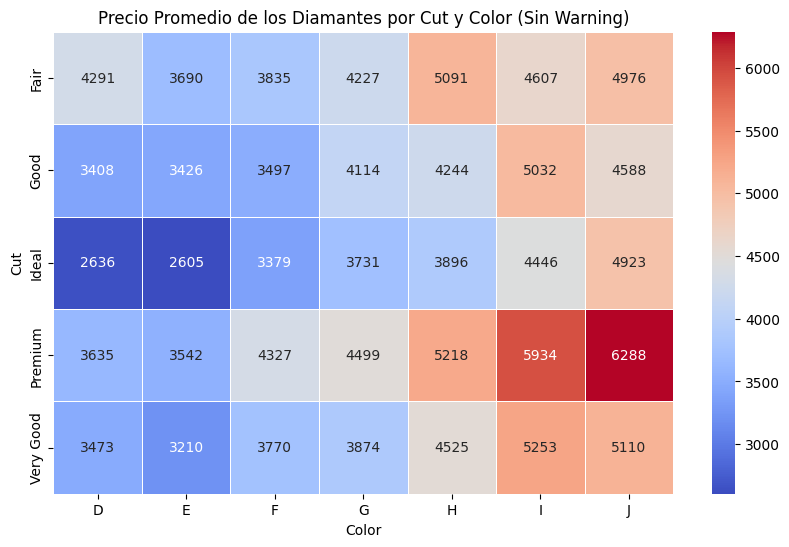

In [ ]:
# Pivot table usando "cut" y "color" como índice y columnas, y "price" como valores
pivot_table = df_diamonds.pivot_table(index="cut", columns="color", values="price", aggfunc="mean", observed=False)

# Heatmap para visualizar la pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)
plt.title("Precio Promedio de los Diamantes por Cut y Color (Sin Warning)")
plt.xlabel("Color")
plt.ylabel("Cut")
plt.show()

* hue, style, size, row, col usando un relplot

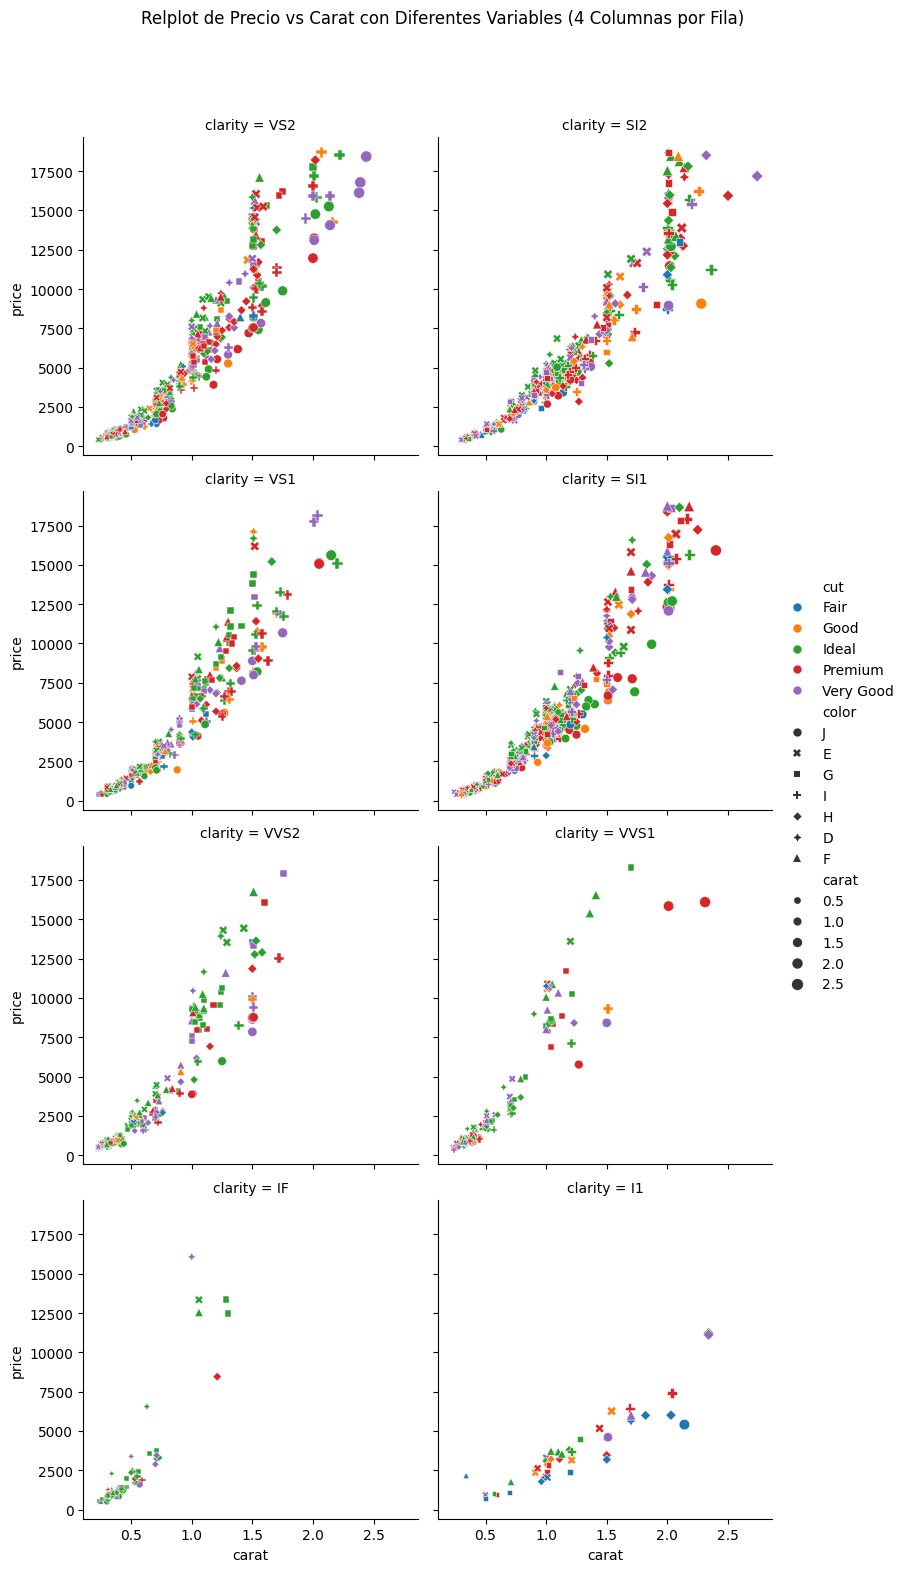

In [129]:
# Relplot combinando múltiples atributos
sns.relplot(
    data=df_diamonds.sample(3000, random_state=42),
    x="carat", y="price",
    hue="cut", style="color", size="carat",
    col="clarity", col_wrap=2,  # 2 gráficos por fila
    height=4, aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Relplot de Precio vs Carat con Diferentes Variables (4 Columnas por Fila)")
plt.show()


* Filtro

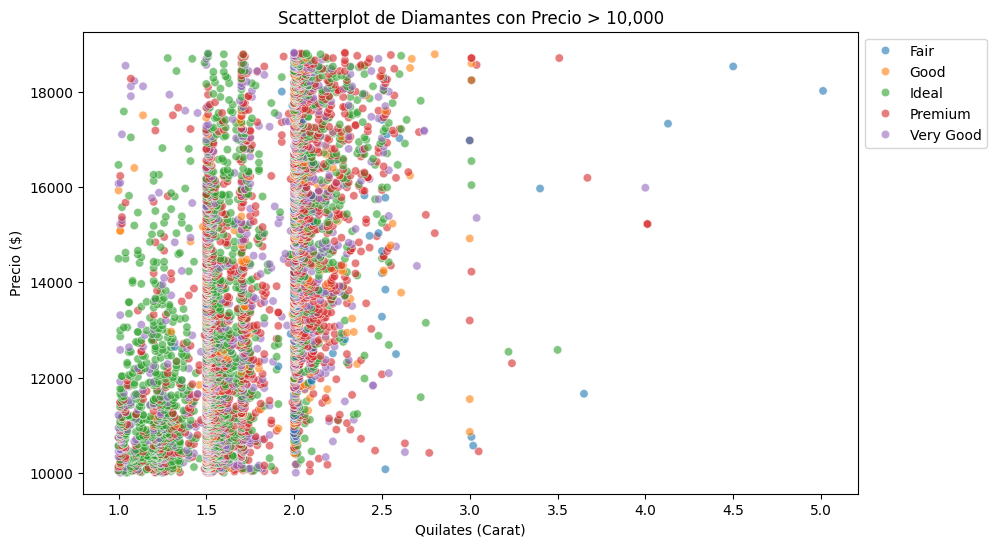

In [ ]:
# Filtrar diamantes con precio mayor a 10,000
df_filtered = df_diamonds[df_diamonds['price'] > 10000]

# Scatterplot con los datos filtrados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='carat', y='price', hue='cut', alpha=0.6)
plt.xlabel('Quilates (Carat)')
plt.ylabel('Precio ($)')
plt.title('Scatterplot de Diamantes con Precio > 10,000')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()
